# 3. Nearest Neighbors

In [3]:
def _rmse_grid_search(training_features, training_labels, pipeline, parameters, technique):
    """
    Input:
        training_features: world_values responses on the training set
        training_labels: HDI (human development index) on the training set
        pipeline: regression model specific pipeline
        parameters: regression model specific parameters
        technique: regression model's name

    Output:
        Prints best RMSE and best estimator
        Prints feature weights for Ridge and Lasso Regression
        Plots RMSE vs k for k Nearest Neighbors Regression
    """
    grid = GridSearchCV(estimator=pipeline,
                        param_grid=parameters,
                        scoring='neg_mean_squared_error')
    grid.fit(training_features,
             training_labels)
    print("RMSE:", sqrt(-grid.best_score_))
    print(grid.best_estimator_)

    # Check Ridge or Lasso Regression
    if hasattr(grid.best_estimator_.named_steps[technique], 'coef_'):
        print(grid.best_estimator_.named_steps[technique].coef_)
    else:
        # Plot RMSE vs k for k Nearest Neighbors Regression
        plt.plot(grid.cv_results_['param_knn__n_neighbors'],
                 (-grid.cv_results_['mean_test_score'])**0.5)
        plt.xlabel('k')
        plt.ylabel('RMSE')
        plt.title('RMSE versus k in kNN')
        plt.show()
        
        # find the k with the smallest RMSE
        L=(-grid.cv_results_['mean_test_score'])**0.5
        min_ind=min(range(len(L)), key=L.__getitem__)
        print("The best value of K is ",min_ind, "with a RMSE of ", min((-grid.cv_results_['mean_test_score'])**0.5))
        print()

    print()


def regression_grid_searches(training_features, training_labels):
    """
    Input:
        training_features: world_values responses on the training set
        training_labels: HDI (human development index) on the training set

    Output:
        Prints best RMSE, best estimator, feature weights for Ridge and Lasso Regression
        Prints best RMSE, best estimator, and plots RMSE vs k for k Nearest Neighbors Regression
    """

#     print("Ridge Regression")
#     _rmse_grid_search(training_features, training_labels,
#                 ridge_regression_pipeline, regression_ridge_parameters, 'ridge')

#     print("Lasso Regression")
#     _rmse_grid_search(training_features, training_labels,
#                 lasso_regression_pipeline, regression_lasso_parameters, 'lasso')

    print("k Nearest Neighbors Regression")
    _rmse_grid_search(training_features, training_labels,
                k_nearest_neighbors_regression_pipeline,
                regression_knn_parameters, 'knn')


def _accuracy_grid_search(training_features, training_classes, pipeline, parameters):
    """
    Input:
        training_features: world_values responses on the training set
        training_labels: HDI (human development index) on the training set
        pipeline: classification model specific pipeline
        parameters: classification model specific parameters

    Output:
        Prints best accuracy and best estimator of classification model
    """
    grid = GridSearchCV(estimator=pipeline,
                        param_grid=parameters,
                        scoring='accuracy')
    grid.fit(training_features, training_classes)
    print("Accuracy:", grid.best_score_)
    print(grid.best_estimator_)
    print()


def classification_grid_searches(training_features, training_classes):
    """
    Input:
        training_features: world_values responses on the training set
        training_labels: HDI (human development index) on the training set

    Output:
        Prints best accuracy and best estimator for SVM and k Nearest Neighbors Classification
    """
#     print("SVM Classification")
#     _accuracy_grid_search(training_features, training_classes,
#                         svm_classification_pipeline,
#                         classification_svm_parameters)

    print("k Nearest Neighbors Classification")
    _accuracy_grid_search(training_features, training_classes,
                        k_nearest_neighbors_classification_pipeline,
                        classification_knn_parameters)


Predicting HDI from World Values Survey

Importing Training and Testing Data
Training Data Count: 148
Test Data Count: 38

Action taken on climate change 0.473312891543
Better transport and roads -0.439633638622
Support for people who can't work -0.336213236721
Access to clean water and sanitation -0.018169084456
Better healthcare -0.422012359959
A good education -0.303978889772
A responsive government we can trust 0.329445314984
Phone and internet access -0.351604712158
Reliable energy at home -0.285423563836
Affordable and nutritious food 0.195193300786
Protecting forests rivers and oceans 0.613458756271
Protection against crime and violence 0.14331869918
Political freedoms 0.238099006821
Freedom from discrimination and persecution 0.432932375445
Equality between men and women 0.276496043498
Better job opportunities -0.39734452674

Most positively correlcated with HDI: 0.6135 Protecting forests rivers and oceans
Most negatively correlcated with HDI: -0.4396 Better transport and roads

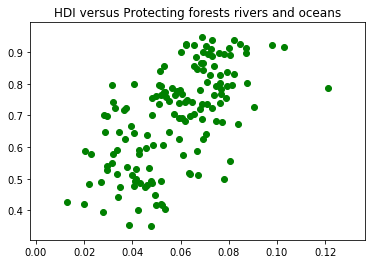

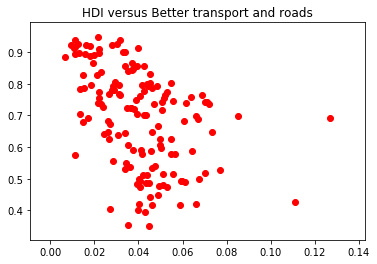

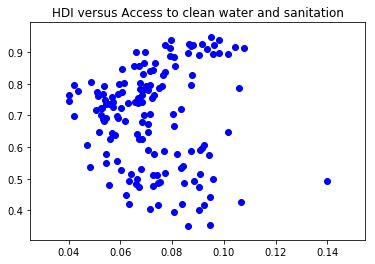

Part C: The positively correlated feature plot looks like a random variable drawn from a multivariate gaussian with positive covariance terms. The negatively correlated feature plot looks like a random variable drawn from a multivariate gaussian with negative covariance terms. And the least correlated feature plot looks like a random variable drawn from a multivariate gaussian with zero in the covariance terms.

Part D:


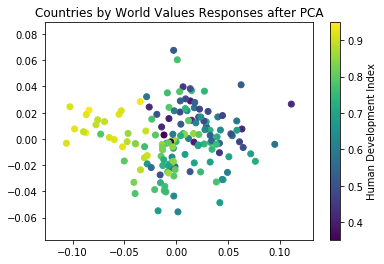

Ridge Regression
RMSE: 0.1228851878458612
Pipeline(steps=[('ridge', Ridge(alpha=0.015399999999999968, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001))])
[[ 0.82390399 -0.73313065 -0.13030642 -1.41827712 -0.68896499 -0.88008295
   0.77086215 -0.98801489 -0.93020749  0.4555187   2.22074781 -0.14690259
   0.52339837  0.75672096  0.43495406 -0.07021889]]

Lasso Regression
RMSE: 0.1259803419253279
Pipeline(steps=[('lasso', Lasso(alpha=0.00018099999999999979, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False))])
[ 0.24112319 -0.73414237 -0.         -0.98296441 -0.67486502 -0.09330813
  0.3684455  -0.40891727 -0.          0.          3.43601188  0.          0.
  0.89253437  0.35524641 -0.        ]


Part E
RIDGE: By testing over a smaller range but with a smaller step size, the hyperparamter for ridge was

In [4]:
"""
The world_values data set is available online at http://54.227.246.164/dataset/. In the data,
    residents of almost all countries were asked to rank their top 6 'priorities'. Specifically,
    they were asked "Which of these are most important for you and your family?"

This code and world-values.tex guides the student through the process of training several models
    to predict the HDI (Human Development Index) rating of a country from the responses of its
    citizens to the world values data. The new model they will try is k Nearest Neighbors (kNN).
    The students should also try to understand *why* the kNN works well.
"""

from math import sqrt
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from world_values_utils import import_world_values_data
from world_values_utils import hdi_classification
from world_values_utils import calculate_correlations
from world_values_utils import plot_pca

from world_values_pipelines import ridge_regression_pipeline
from world_values_pipelines import lasso_regression_pipeline
from world_values_pipelines import k_nearest_neighbors_regression_pipeline
from world_values_pipelines import svm_classification_pipeline
from world_values_pipelines import k_nearest_neighbors_classification_pipeline

from world_values_parameters import regression_ridge_parameters
from world_values_parameters import regression_lasso_parameters
from world_values_parameters import regression_knn_parameters
from world_values_parameters import classification_svm_parameters
from world_values_parameters import classification_knn_parameters


def main():
    print("Predicting HDI from World Values Survey")
    print()

    # Import Data #
    print("Importing Training and Testing Data")
    values_train, hdi_train, values_test = import_world_values_data()

    # Center the HDI Values #
    hdi_scaler = StandardScaler(with_std=False)
    hdi_shifted_train = hdi_scaler.fit_transform(hdi_train)

    # Classification Data #
    hdi_class_train = hdi_train['2015'].apply(hdi_classification)

    # Data Information #
    print('Training Data Count:', values_train.shape[0])
    print('Test Data Count:', values_test.shape[0])
    print()

    # Calculate Correlations #
    calculate_correlations(values_train, hdi_train)
    
    print("Part C: The positively correlated feature plot looks like a random variable drawn from a multivariate gaussian with positive covariance terms. The negatively correlated feature plot looks like a random variable drawn from a multivariate gaussian with negative covariance terms. And the least correlated feature plot looks like a random variable drawn from a multivariate gaussian with zero in the covariance terms.")
    

    # PCA #
    print()
    print("Part D:")
    plot_pca(values_train, hdi_train, hdi_class_train)

    # Regression Grid Searches #

    
    regression_grid_searches(training_features=values_train,
                             training_labels=hdi_shifted_train)
    print()
    print("Part E")
    print("RIDGE: By testing over a smaller range but with a smaller step size, the hyperparamter for ridge was found to be .01539 and that reduced the RMSE to 0.1228")
    print()
    print("Part F")
    print("LASSO: By testing over a smaller range but with a smaller step size, the hyperparamter for lasso was found to be 0.0001809 and that reduced the RMSE to 0.12598")
    print()
    print("Part G")
    print("The LASSO technique resulted in 6 feature weights to be zero whereas RIDGE had 0 feature weights at zero")
    print()
    

    # Classification Grid Searches #
    # classification_grid_searches(training_features=values_train,
    #                              training_classes=hdi_class_train)



if __name__ == '__main__':
    main()


Part H:

To adapt the K nearest neighbors algorithm for continuous outputs, you could take the mean of the k nearest neighbors as the output.  It's the continuous equivalent of majority voting.

k Nearest Neighbors Regression
RMSE: 0.1182458946077689
Pipeline(steps=[('knn', KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=12, p=2,
          weights='uniform'))])


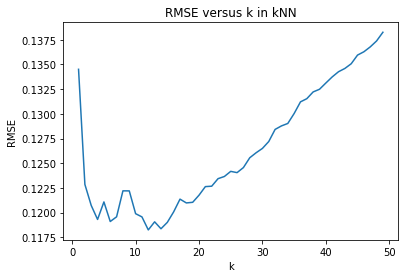

Part J:
The best value of K is  11 with a RMSE of  0.118245894608




In [6]:
from math import sqrt
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from world_values_utils import import_world_values_data
from world_values_utils import hdi_classification
from world_values_utils import calculate_correlations
from world_values_utils import plot_pca

from world_values_pipelines import ridge_regression_pipeline
from world_values_pipelines import lasso_regression_pipeline
from world_values_pipelines import k_nearest_neighbors_regression_pipeline
from world_values_pipelines import svm_classification_pipeline
from world_values_pipelines import k_nearest_neighbors_classification_pipeline

from world_values_parameters import regression_ridge_parameters
from world_values_parameters import regression_lasso_parameters
from world_values_parameters import regression_knn_parameters
from world_values_parameters import classification_svm_parameters
from world_values_parameters import classification_knn_parameters


def main():

    # Import Data #
    values_train, hdi_train, values_test = import_world_values_data()

    # Center the HDI Values #
    hdi_scaler = StandardScaler(with_std=False)
    hdi_shifted_train = hdi_scaler.fit_transform(hdi_train)

    # Classification Data #
    hdi_class_train = hdi_train['2015'].apply(hdi_classification)



    # Regression Grid Searches #

    
    regression_grid_searches(training_features=values_train,
                             training_labels=hdi_shifted_train)
    

    # Classification Grid Searches #
    # classification_grid_searches(training_features=values_train,
    #                              training_classes=hdi_class_train)



if __name__ == '__main__':
    main()

Part I: the 7 nearest neighbors of the USA are

In [6]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors

values_train = pd.read_csv('world-values-train2.csv')
Country = values_train['Country']
values_train_edit = values_train.drop(['Country'], axis=1)

model = NearestNeighbors(n_neighbors=8)
model.fit(values_train_edit) 
prediction = model.kneighbors([values_train_edit.T[45]])
country_num = prediction[1][0]

for i in country_num:
    print(Country[i])

United States
Ireland
United Kingdom
Belgium
Finland
Malta
Austria
France


Part K: 
The plot in part J in terms of bias and variance.  Since we're looking at testing error, the plot reflects both bias and variance.  As K goes up, we have more bias because we are adding training points.  But, as K increases, the variance decreases.  So from the plot, it appears that the variance is driving the initial drop in error and bias drives the ending increase in error.

Part L: distance weighting

k Nearest Neighbors Regression
RMSE: 0.1171925270311745
Pipeline(steps=[('knn', KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=14, p=2,
          weights='distance'))])


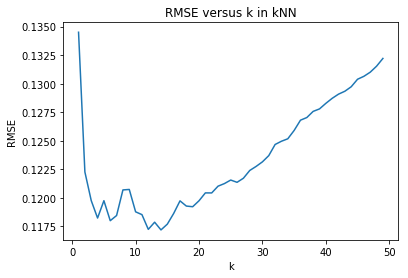

The best value of K is  13 with a RMSE of  0.117192527031




In [2]:
from math import sqrt
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from world_values_utils import import_world_values_data
from world_values_utils import hdi_classification
from world_values_utils import calculate_correlations
from world_values_utils import plot_pca

from world_values_pipelines import ridge_regression_pipeline
from world_values_pipelines import lasso_regression_pipeline
from world_values_pipelines import k_nearest_neighbors_regression_pipeline
from world_values_pipelines import svm_classification_pipeline
from world_values_pipelines import k_nearest_neighbors_classification_pipeline

from world_values_parameters import regression_ridge_parameters
from world_values_parameters import regression_lasso_parameters
from world_values_parameters import regression_knn_parameters
from world_values_parameters import classification_svm_parameters
from world_values_parameters import classification_knn_parameters


def main():

    # Import Data #
    values_train, hdi_train, values_test = import_world_values_data()

    # Center the HDI Values #
    hdi_scaler = StandardScaler(with_std=False)
    hdi_shifted_train = hdi_scaler.fit_transform(hdi_train)

    # Classification Data #
    hdi_class_train = hdi_train['2015'].apply(hdi_classification)



    # Regression Grid Searches #

    
    regression_grid_searches(training_features=values_train,
                             training_labels=hdi_shifted_train)
    

    # Classification Grid Searches #
    # classification_grid_searches(training_features=values_train,
    #                              training_classes=hdi_class_train)



if __name__ == '__main__':
    main()

Part N:

k Nearest Neighbors Regression
RMSE: 0.7515571300426367
Pipeline(steps=[('knn', KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=14, p=2,
          weights='distance'))])


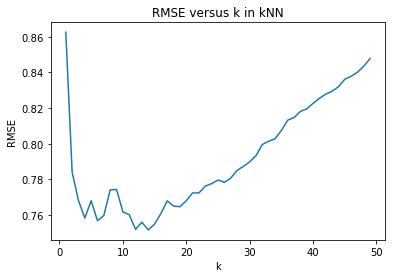

The best value of K is  13 with a RMSE of  0.751557130043




In [17]:
# we now need to scale the feature columns so that they all have unit variance
# divide each column by the norm of it 
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from world_values_utils import import_world_values_data
from world_values_utils import hdi_classification
from world_values_utils import calculate_correlations
from world_values_utils import plot_pca

from world_values_pipelines import ridge_regression_pipeline
from world_values_pipelines import lasso_regression_pipeline
from world_values_pipelines import k_nearest_neighbors_regression_pipeline
from world_values_pipelines import svm_classification_pipeline
from world_values_pipelines import k_nearest_neighbors_classification_pipeline

from world_values_parameters import regression_ridge_parameters
from world_values_parameters import regression_lasso_parameters
from world_values_parameters import regression_knn_parameters
from world_values_parameters import classification_svm_parameters
from world_values_parameters import classification_knn_parameters


def main():

    # Import Data #
    values_train, hdi_train, values_test = import_world_values_data()
    

    # Center the HDI Values #
    hdi_scaler = StandardScaler(with_std=True)
    hdi_shifted_train = hdi_scaler.fit_transform(hdi_train)

    # Classification Data #
    hdi_class_train = hdi_train['2015'].apply(hdi_classification)



    # Regression Grid Searches #

    
    regression_grid_searches(training_features=values_train,
                             training_labels=hdi_shifted_train)
    

    # Classification Grid Searches #
    # classification_grid_searches(training_features=values_train,
    #                              training_classes=hdi_class_train)



if __name__ == '__main__':
    main()

Part M: the 7 nearest neighbors of the USA after scaling are

In [18]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors

values_train = pd.read_csv('world-values-train2.csv')
Country = values_train['Country']
values_train_edit = values_train.drop(['Country'], axis=1)

model = NearestNeighbors(n_neighbors=8)
model.fit(values_train_edit) 
prediction = model.kneighbors([values_train_edit.T[45]])
country_num = prediction[1][0]

for i in country_num:
    print(Country[i])

United States
Ireland
United Kingdom
Belgium
Finland
Malta
Austria
France


Part P: 
So far, my best method in terms of minimizing RMSE is to use ridge regression with a parameter value of alpha=0.015399999999999968

In [14]:
from sklearn.linear_model import Ridge
import numpy as np
values_train, hdi_train, values_test = import_world_values_data()
clf = Ridge(alpha=0.015399999999999968)
clf.fit(values_train,hdi_train) 
predict=clf.predict(values_test)

with open('submission.txt','w') as f:
    for i in range(len(predict)):
        f.write(str(np.round(predict[i],4)[0].item()))
        f.write("\n")

Part Q: In any classification problem with K classes, the accuracy we are guaranteed to get with the best naive classifier is 1/k.

Part R:

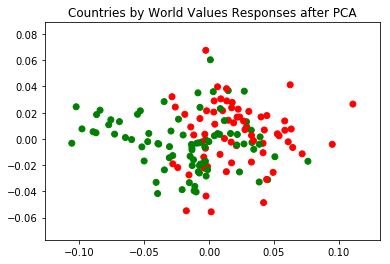

In [19]:
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from world_values_utils import import_world_values_data
from world_values_utils import hdi_classification
from world_values_utils import calculate_correlations
from world_values_utils import plot_pca

from world_values_pipelines import ridge_regression_pipeline
from world_values_pipelines import lasso_regression_pipeline
from world_values_pipelines import k_nearest_neighbors_regression_pipeline
from world_values_pipelines import svm_classification_pipeline
from world_values_pipelines import k_nearest_neighbors_classification_pipeline

from world_values_parameters import regression_ridge_parameters
from world_values_parameters import regression_lasso_parameters
from world_values_parameters import regression_knn_parameters
from world_values_parameters import classification_svm_parameters
from world_values_parameters import classification_knn_parameters


def main():
    # Import Data #
    values_train, hdi_train, values_test = import_world_values_data()

    # Center the HDI Values #
    hdi_scaler = StandardScaler(with_std=False)
    hdi_shifted_train = hdi_scaler.fit_transform(hdi_train)

    # Classification Data #
    hdi_class_train = hdi_train['2015'].apply(hdi_classification)
#     print(hdi_class_train)

    # PCA #
    plot_pca(values_train, hdi_train, hdi_class_train)


if __name__ == '__main__':
    main()

Part S: 
A linear SVM would not do well in classification because the two sets are not obviously linearly separable.

Part T: SVM Classifier with linear kernel

The accuracy is 75%

In [23]:
from math import sqrt
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from world_values_utils import import_world_values_data
from world_values_utils import hdi_classification
from world_values_utils import calculate_correlations
from world_values_utils import plot_pca

from world_values_pipelines import ridge_regression_pipeline
from world_values_pipelines import lasso_regression_pipeline
from world_values_pipelines import k_nearest_neighbors_regression_pipeline
from world_values_pipelines import svm_classification_pipeline
from world_values_pipelines import k_nearest_neighbors_classification_pipeline

from world_values_parameters import regression_ridge_parameters
from world_values_parameters import regression_lasso_parameters
from world_values_parameters import regression_knn_parameters
from world_values_parameters import classification_svm_parameters
from world_values_parameters import classification_knn_parameters


def main():
    # Import Data #
    values_train, hdi_train, values_test = import_world_values_data()

    # Center the HDI Values #
    hdi_scaler = StandardScaler(with_std=False)
    hdi_shifted_train = hdi_scaler.fit_transform(hdi_train)

    # Classification Data #
    hdi_class_train = hdi_train['2015'].apply(hdi_classification)    

    # Classification Grid Searches #
    classification_grid_searches(training_features=values_train,
                                 training_classes=hdi_class_train)


if __name__ == '__main__':
    main()


SVM Classification
Accuracy: 0.75
Pipeline(steps=[('svm', SVC(C=48.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])



Part U: Add a PCA and Scaling to SVM

In [2]:
from math import sqrt
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

from world_values_utils import import_world_values_data
from world_values_utils import hdi_classification
from world_values_utils import calculate_correlations
from world_values_utils import plot_pca

from world_values_pipelines import ridge_regression_pipeline
from world_values_pipelines import lasso_regression_pipeline
from world_values_pipelines import k_nearest_neighbors_regression_pipeline
from world_values_pipelines import svm_classification_pipeline
from world_values_pipelines import k_nearest_neighbors_classification_pipeline

from world_values_parameters import regression_ridge_parameters
from world_values_parameters import regression_lasso_parameters
from world_values_parameters import regression_knn_parameters
from world_values_parameters import classification_svm_parameters
from world_values_parameters import classification_knn_parameters


def main():
    # Import Data #
    values_train, hdi_train, values_test = import_world_values_data()

    # Center the HDI Values #
    hdi_scaler = StandardScaler(with_std=True)
    hdi_shifted_train = hdi_scaler.fit_transform(hdi_train)

    # Classification Data #
    hdi_class_train = hdi_train['2015'].apply(hdi_classification) 
    
    pca = PCA()
    transformed_features = pca.fit_transform(values_train)
    
    # Apply PCA to SVM Classification
         #('pca', PCA()),

            # Apply scaling to SVM Classification
         #('scale', StandardScaler()),

    # Classification Grid Searches #
    classification_grid_searches(training_features=transformed_features,
                                 training_classes=hdi_class_train)

if __name__ == '__main__':
    main()


SVM Classification
Accuracy: 0.547297297297
Pipeline(steps=[('svm', SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])



Part V: RBF Kernel

In [2]:
from math import sqrt
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from world_values_utils import import_world_values_data
from world_values_utils import hdi_classification
from world_values_utils import calculate_correlations
from world_values_utils import plot_pca

from world_values_pipelines import ridge_regression_pipeline
from world_values_pipelines import lasso_regression_pipeline
from world_values_pipelines import k_nearest_neighbors_regression_pipeline
from world_values_pipelines import svm_classification_pipeline
from world_values_pipelines import k_nearest_neighbors_classification_pipeline

from world_values_parameters import regression_ridge_parameters
from world_values_parameters import regression_lasso_parameters
from world_values_parameters import regression_knn_parameters
from world_values_parameters import classification_svm_parameters
from world_values_parameters import classification_knn_parameters


def main():
    # Import Data #
    values_train, hdi_train, values_test = import_world_values_data()

    # Center the HDI Values #
    hdi_scaler = StandardScaler(with_std=False)
    hdi_shifted_train = hdi_scaler.fit_transform(hdi_train)

    # Classification Data #
    hdi_class_train = hdi_train['2015'].apply(hdi_classification)    

    # Classification Grid Searches #
    classification_grid_searches(training_features=values_train,
                                 training_classes=hdi_class_train)


if __name__ == '__main__':
    main()


SVM Classification
Accuracy: 0.689189189189
Pipeline(steps=[('svm', SVC(C=98.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])



Part W: KNN for classification without scaling

In [4]:
from math import sqrt
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from world_values_utils import import_world_values_data
from world_values_utils import hdi_classification
from world_values_utils import calculate_correlations
from world_values_utils import plot_pca

from world_values_pipelines import ridge_regression_pipeline
from world_values_pipelines import lasso_regression_pipeline
from world_values_pipelines import k_nearest_neighbors_regression_pipeline
from world_values_pipelines import svm_classification_pipeline
from world_values_pipelines import k_nearest_neighbors_classification_pipeline

from world_values_parameters import regression_ridge_parameters
from world_values_parameters import regression_lasso_parameters
from world_values_parameters import regression_knn_parameters
from world_values_parameters import classification_svm_parameters
from world_values_parameters import classification_knn_parameters


def main():
    # Import Data #
    values_train, hdi_train, values_test = import_world_values_data()

    # Center the HDI Values #
    hdi_scaler = StandardScaler(with_std=False)
    hdi_shifted_train = hdi_scaler.fit_transform(hdi_train)

    # Classification Data #
    hdi_class_train = hdi_train['2015'].apply(hdi_classification)    

    # Classification Grid Searches #
    classification_grid_searches(training_features=values_train,
                                 training_classes=hdi_class_train)


if __name__ == '__main__':
    main()

k Nearest Neighbors Classification
Accuracy: 0.763513513514
Pipeline(steps=[('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='distance'))])



KNN for classification with scaling - scaling does not affect K nearest neighbors

In [5]:
from math import sqrt
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from world_values_utils import import_world_values_data
from world_values_utils import hdi_classification
from world_values_utils import calculate_correlations
from world_values_utils import plot_pca

from world_values_pipelines import ridge_regression_pipeline
from world_values_pipelines import lasso_regression_pipeline
from world_values_pipelines import k_nearest_neighbors_regression_pipeline
from world_values_pipelines import svm_classification_pipeline
from world_values_pipelines import k_nearest_neighbors_classification_pipeline

from world_values_parameters import regression_ridge_parameters
from world_values_parameters import regression_lasso_parameters
from world_values_parameters import regression_knn_parameters
from world_values_parameters import classification_svm_parameters
from world_values_parameters import classification_knn_parameters


def main():
    # Import Data #
    values_train, hdi_train, values_test = import_world_values_data()

    # Center the HDI Values #
    hdi_scaler = StandardScaler(with_std=True)
    hdi_shifted_train = hdi_scaler.fit_transform(hdi_train)

    # Classification Data #
    hdi_class_train = hdi_train['2015'].apply(hdi_classification)    

    # Classification Grid Searches #
    classification_grid_searches(training_features=values_train,
                                 training_classes=hdi_class_train)


if __name__ == '__main__':
    main()

k Nearest Neighbors Classification
Accuracy: 0.763513513514
Pipeline(steps=[('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='distance'))])



Part X:

In [7]:
# the hdi of berkeley
berkeley=[68,46,26,116,98,198,83,115,78,118,39,116,58,99,64,89] 

from sklearn.linear_model import Ridge
import numpy as np
values_train, hdi_train, values_test = import_world_values_data()
clf = Ridge(alpha=0.015399999999999968)
clf.fit(values_train,hdi_train) 
predict=clf.predict(berkeley)

print(predict)

[[-258.66721197]]


C:\Users\laura_brink\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


Part Y:

Part Z: From this problem, I learned how to use Sklearn a bit better and how scaling affects the different algorithms. But I don't really like the problems with starter code because I never get a full understanding of what is happening with the code.  This was a very manageable problem that we got to do a lot with.

# 4. Matching Pursuit

Implement matching pursuit on the data:
Set w=0.  Then move wi such that Xw will be closest to y.  Plot the error when changing the number of wi elements we want to be zero

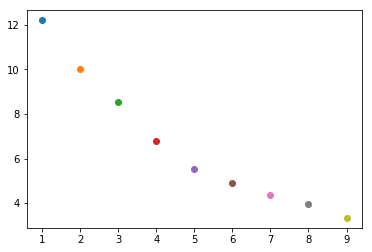

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import OrthogonalMatchingPursuit


N=50 # number of samples
D=10 # number of features
# generate X with N samples and D features
X= 3*np.random.rand(N,D)
W= 2*np.random.rand(D,1)
Y= np.dot(X,W)+np.random.rand(N,1)

error=np.zeros(D)
plt.figure()

for j in range(1,D):
    n_nonzero_coefs=j

    omp = OrthogonalMatchingPursuit(n_nonzero_coefs=n_nonzero_coefs)
    omp.fit(X, Y)
    coef = omp.coef_
    idx_r, = coef.nonzero()

    error[j]=1/N*np.linalg.norm(np.dot(X,coef)-Y,2)
    plt.plot(j,error[j],"o")

plt.show()

